In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors

In [9]:
# Matrix of original cell mutation data
original_data = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
])

print(original_data.shape)

(23, 41)


In [60]:
# Transpose to swap rows and columns
transposed_data = np.transpose(original_data.copy())
# Sort by new rows in reverse order, i.e. the columns of the original data
col_sorted_data = transposed_data[np.argsort([-1 * np.count_nonzero(col) for col in transposed_data],
                                             kind = "stable")]

col_sorted_data[10:11] *= 2
col_sorted_data[11:17] *= 3
col_sorted_data[17:28] *= 4
col_sorted_data[28:33] *= 5
col_sorted_data[33:37] *= 6
col_sorted_data[37:41] *= 7

# Transpose again to switch rows back to columns
col_sorted_data = np.transpose(col_sorted_data)

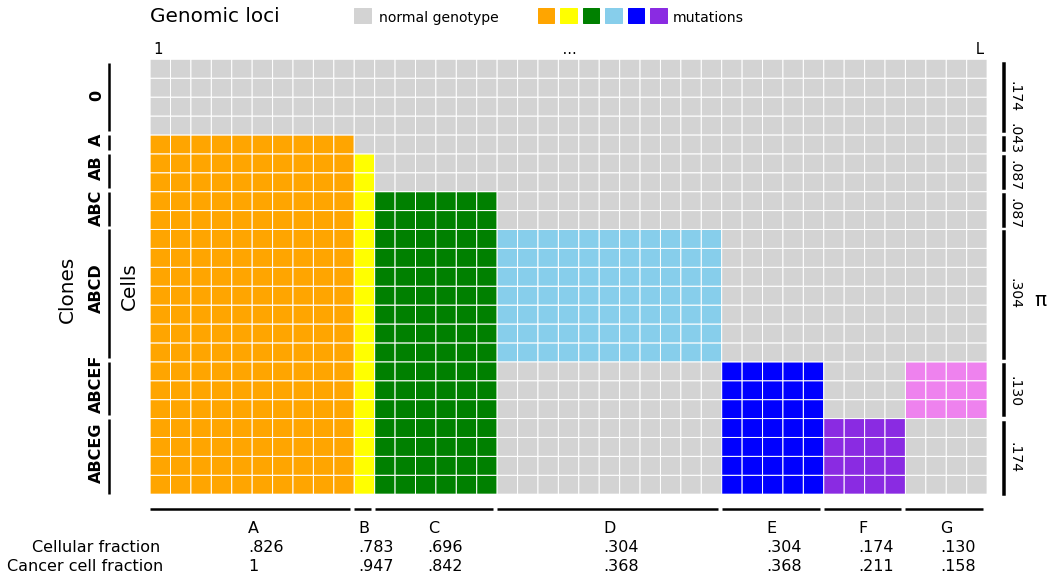

In [80]:
mutation_colours = ['lightgrey', 'orange', 'yellow', 'green', 'skyblue', 'blue',
                    'blueviolet', 'violet']

# Create plot and add data
plt.figure(figsize = (15, 8))
plt.pcolor(col_sorted_data[::-1], cmap = colors.ListedColormap(mutation_colours),
           edgecolors = 'white', linewidths = 1)

# Hide plot edge and axes
plt.box(False)
plt.axis('off')

# Set title and axis labels
plt.title("1" + " " * 84 + "..." + " " * 84 + "L", fontsize = 15)
plt.text(0, 25, "Genomic loci", fontsize = 20)
plt.text(-1.5, 10, "Cells", fontsize = 20, rotation = 90)
plt.text(-4.5, 9.3, "Clones", fontsize = 20, rotation = 90)
plt.text(43.3, 10, "π", fontsize = 20)

# Add legend
plt.gca().add_patch(patches.Rectangle((10, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[0], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((19, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[1], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((20.1, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[2], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((21.2, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[3], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((22.3, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[4], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((23.4, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[5], clip_on = False,
                                      linewidth = 1))
plt.gca().add_patch(patches.Rectangle((24.5, 24.9), 0.8, 0.8, fill = True,
                                      color = mutation_colours[6], clip_on = False,
                                      linewidth = 1))
plt.text(11.2, 25, "normal genotype", fontsize = 14)
plt.text(25.6, 25, "mutations", fontsize = 14)

# Add left lines and annotations
plt.gca().add_patch(patches.Rectangle((-2, 19.2), 0.005, 3.6, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 18.2), 0.005, 0.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 16.2), 0.005, 1.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 14.2), 0.005, 1.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 7.2), 0.005, 6.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 4.2), 0.005, 2.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((-2, 0), 0.005, 4, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(-3, 21, "0", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 18.6, "A", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 16.8, "AB", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 14.4, "ABC", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 9.8, "ABCD", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 4.5, "ABCEF", fontsize = 16, rotation = 90, fontweight = 'bold')
plt.text(-3, 0.8, "ABCEG", fontsize = 16, rotation = 90, fontweight = 'bold')

# Add right lines and annotations
plt.gca().add_patch(patches.Rectangle((41.8, 19.2), 0.005, 3.6, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((41.8, 18.2), 0.005, 0.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((41.8, 16.2), 0.005, 1.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((41.8, 14.2), 0.005, 1.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((41.8, 7.2), 0.005, 6.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((41.8, 4.2), 0.005, 2.7, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((41.8, 0), 0.005, 3.8, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(42, 20.4, ".174", fontsize = 14, rotation = 270)
plt.text(42, 18.2, ".043", fontsize = 14, rotation = 270)
plt.text(42, 16.2, ".087", fontsize = 14, rotation = 270)
plt.text(42, 14.2, ".087", fontsize = 14, rotation = 270)
plt.text(42, 10, ".304", fontsize = 14, rotation = 270)
plt.text(42, 4.8, ".130", fontsize = 14, rotation = 270)
plt.text(42, 1.3, ".174", fontsize = 14, rotation = 270)

# Add lower lines and annotations
plt.gca().add_patch(patches.Rectangle((0, -0.8), 9.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((10, -0.8), 0.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((11, -0.8), 5.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((17, -0.8), 10.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((28, -0.8), 4.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((33, -0.8), 3.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))
plt.gca().add_patch(patches.Rectangle((37, -0.8), 3.8, 0.005, fill = True,
                                      color = "black", clip_on = False,
                                      linewidth = 2.5))

plt.text(4.8, -2, "A", fontsize = 16)
plt.text(4.8, -3, ".826", fontsize = 16)
plt.text(4.8, -4, "1", fontsize = 16)

plt.text(10.2, -2, "B", fontsize = 16)
plt.text(10.2, -3, ".783", fontsize = 16)
plt.text(10.2, -4, ".947", fontsize = 16)

plt.text(13.6, -2, "C", fontsize = 16)
plt.text(13.6, -3, ".696", fontsize = 16)
plt.text(13.6, -4, ".842", fontsize = 16)

plt.text(22.2, -2, "D", fontsize = 16)
plt.text(22.2, -3, ".304", fontsize = 16)
plt.text(22.2, -4, ".368", fontsize = 16)

plt.text(30.2, -2, "E", fontsize = 16)
plt.text(30.2, -3, ".304", fontsize = 16)
plt.text(30.2, -4, ".368", fontsize = 16)

plt.text(34.7, -2, "F", fontsize = 16)
plt.text(34.7, -3, ".174", fontsize = 16)
plt.text(34.7, -4, ".211", fontsize = 16)

plt.text(38.7, -2, "G", fontsize = 16)
plt.text(38.7, -3, ".130", fontsize = 16)
plt.text(38.7, -4, ".158", fontsize = 16)

plt.text(-5.8, -3, "Cellular fraction", fontsize = 16)
plt.text(-7, -4, "Cancer cell fraction", fontsize = 16)

plt.show()